In [331]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import joblib
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score, accuracy_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



In [221]:
#train.to_csv('s3://germancreditcsr/datos/original/datos/train.csv', index=False)
#train.to_csv('s3://germancreditcsr/datos/original/datos/test.csv', index=False)

## Cargue de datos 

In [222]:
train = pd.read_csv('s3://germancreditcsr/datos/original/datos/train.csv')

test = pd.read_csv('s3://germancreditcsr/datos/original/datos/test.csv')



In [223]:
## creacion de Pipeline

In [224]:
## creacion de pipeline numerico

In [225]:
numeric_pipeline = Pipeline(
    [
        ('Imputación con la media',   SimpleImputer(strategy='mean')),
        ('Escalado minmax', MinMaxScaler())
        
    ]
)

In [226]:
## creacion de pipeline categorico 

In [227]:

categorical_pipeline = Pipeline(
        [
            ('imputación moda', SimpleImputer(strategy='most_frequent')),
            ('onehot encoder', OneHotEncoder(sparse=False))
        ]

)

In [228]:
## creacion de pipeline transformer

In [229]:

column_transformer = ColumnTransformer(
            [
                ('numeric pipeline', numeric_pipeline, [0, 1, 2]),
                ('categorical pipeline', categorical_pipeline, [3, 4, 5])
            ]
)
## arreglo de tuplas de tres elementos , transformador , arreglo con los indices de las columnas 

In [230]:
train.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [231]:
## Creacion de feautres para un futuro uso 

In [270]:
## Columnas (0,1,2,3,4,5) incluidas en el pipeline

features=['Age','Credit amount','Duration','Sex','Purpose','Housing']

In [233]:
## Seleccion de las caracteristicas

In [234]:
train = train.dropna()

In [235]:
X_train = train.drop(["Risk","Unnamed: 0"], axis=1)


In [236]:
y_train = train['Risk']


In [237]:
y_train=(y_train=='good').astype("int") ## conveierte en 0 y 1  , esta variable 

In [238]:
X_train=X_train.dropna()

In [239]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 0 to 699
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               361 non-null    int64 
 1   Sex               361 non-null    object
 2   Job               361 non-null    int64 
 3   Housing           361 non-null    object
 4   Saving accounts   361 non-null    object
 5   Checking account  361 non-null    object
 6   Credit amount     361 non-null    int64 
 7   Duration          361 non-null    int64 
 8   Purpose           361 non-null    object
dtypes: int64(4), object(5)
memory usage: 28.2+ KB


In [240]:
X_train =  pd.get_dummies(X_train)

In [241]:
X_train

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,31,2,4473,36,0,1,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
5,36,1,4241,24,0,1,0,1,0,1,...,1,0,1,0,0,0,0,0,0,0
6,35,3,6948,36,0,1,0,0,1,1,...,1,0,0,1,0,0,0,0,0,0
7,24,2,2145,36,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
10,30,2,639,12,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,26,2,4788,48,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
693,36,2,1275,24,0,1,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
694,37,1,1274,12,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
695,41,1,5954,42,1,0,0,1,0,1,...,1,0,1,0,0,0,0,0,0,0


In [242]:
model = DecisionTreeClassifier()

In [243]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [244]:
model.feature_importances_

array([0.10887308, 0.05376071, 0.3332057 , 0.20037283, 0.02345864,
       0.01587798, 0.02807549, 0.0056199 , 0.02959031, 0.01211881,
       0.02520441, 0.01864187, 0.        , 0.02786016, 0.        ,
       0.01798369, 0.        , 0.05266857, 0.        , 0.00760165,
       0.01488656, 0.01592305, 0.00827658, 0.        ])

In [245]:
X_train.columns

Index(['Age', 'Job', 'Credit amount', 'Duration', 'Sex_female', 'Sex_male',
       'Housing_free', 'Housing_own', 'Housing_rent', 'Saving accounts_little',
       'Saving accounts_moderate', 'Saving accounts_quite rich',
       'Saving accounts_rich', 'Checking account_little',
       'Checking account_moderate', 'Checking account_rich',
       'Purpose_business', 'Purpose_car', 'Purpose_domestic appliances',
       'Purpose_education', 'Purpose_furniture/equipment', 'Purpose_radio/TV',
       'Purpose_repairs', 'Purpose_vacation/others'],
      dtype='object')

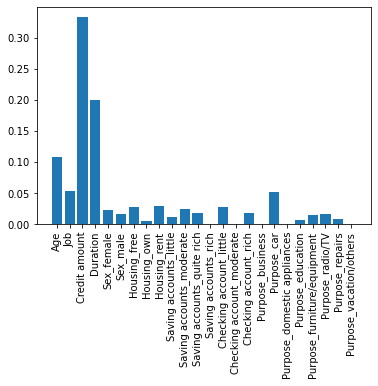

In [246]:
plt.bar(x=X_train.columns, height= model.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [247]:
np.argsort(model.feature_importances_)[::-1]



array([ 2,  3,  0,  1, 17,  8,  6, 13, 10,  4, 11, 15, 21,  5, 20,  9, 22,
       19,  7, 12, 14, 16, 18, 23])

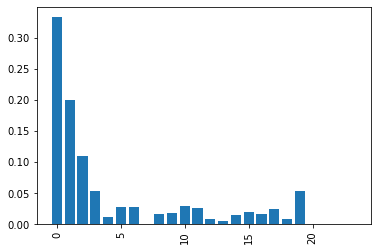

In [248]:
plt.bar(np.argsort(model.feature_importances_)[::-1], height= model.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [249]:
### REGRESION LOGISTICA

In [250]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler


In [251]:
X_train_scaled = MinMaxScaler().fit_transform(X_train)

In [252]:
model = LogisticRegression()

In [253]:
model.fit(X_train_scaled,y_train)

LogisticRegression()

In [254]:
model.coef_

array([[ 0.47424606,  0.46040332, -0.92624159, -2.03116232, -0.19687034,
         0.19696162,  0.06881668,  0.14613817, -0.21486357, -0.46689979,
        -0.41031105,  0.29891103,  0.57839108, -0.38283643, -0.16388134,
         0.54680905,  0.28173634,  0.11494351, -0.14531633, -0.93147024,
         0.17853055,  0.27162217,  0.07962265,  0.15042262]])

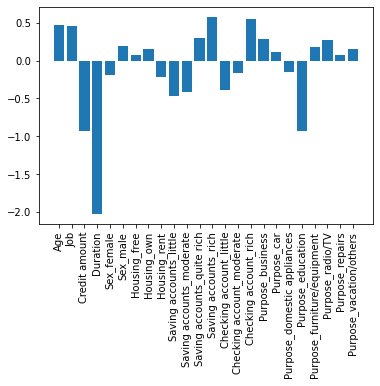

In [255]:
plt.bar(x=X_train.columns, height= model.coef_[0])
plt.xticks(rotation=90)
plt.show()

In [256]:

## EVALUACION DEL MODELOS


In [310]:
train = pd.read_csv('s3://germancreditcsr/datos/original/datos/train.csv')

test = pd.read_csv('s3://germancreditcsr/datos/original/datos/test.csv')




In [312]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        700 non-null    int64 
 1   Age               700 non-null    int64 
 2   Sex               700 non-null    object
 3   Job               700 non-null    int64 
 4   Housing           700 non-null    object
 5   Saving accounts   575 non-null    object
 6   Checking account  426 non-null    object
 7   Credit amount     700 non-null    int64 
 8   Duration          700 non-null    int64 
 9   Purpose           700 non-null    object
 10  Risk              700 non-null    object
dtypes: int64(5), object(6)
memory usage: 60.3+ KB


In [314]:
X_train = train.drop(["Risk" , "Unnamed: 0"], axis=1)

y_train = train['Risk']
y_train = (y_train =='good').astype("int")

In [315]:
final_pipeline = Pipeline(
[("preprocesamiento",column_transformer),
('modelo', DecisionTreeClassifier())
]
)

In [316]:
features

['Age', 'Credit amount', 'Duration', 'Sex', 'Purpose', 'Housing']

In [317]:
X_train= train[features]

In [318]:
results = cross_validate(final_pipeline, X_train, y_train, cv=10, return_train_score=True, scoring=['accuracy','f1'])

In [319]:
print('train:', results['train_accuracy'].mean(), '+-', results['train_accuracy'].std())
print('val:', results['test_accuracy'].mean(), '+-', results['test_accuracy'].std())


train: 1.0 +- 0.0
val: 0.6257142857142857 +- 0.05986379097073419


In [ ]:
## Regresion Logistica

In [320]:
final_pipeline = Pipeline(
[("preprocesamiento",column_transformer),
('modelo', LogisticRegression())
]
)

In [321]:
X_train= train[features]

In [322]:
results = cross_validate(final_pipeline, X_train, y_train, cv=10, return_train_score=True, scoring=['accuracy','f1'])

In [323]:
print('train:', results['train_accuracy'].mean(), '+-', results['train_accuracy'].std())
print('val:', results['test_accuracy'].mean(), '+-', results['test_accuracy'].std())


train: 0.7233333333333334 +- 0.00355286179136497
val: 0.7185714285714286 +- 0.026380264732313422


In [ ]:
## ramdon Forest

In [324]:
final_pipeline = Pipeline(
[("preprocesamiento",column_transformer),
('modelo', RandomForestClassifier())
]
)

In [325]:
X_train= train[features]

In [326]:
results = cross_validate(final_pipeline, X_train, y_train, cv=10, return_train_score=True, scoring=['accuracy','f1'])

In [327]:
print('train:', results['train_accuracy'].mean(), '+-', results['train_accuracy'].std())
print('val:', results['test_accuracy'].mean(), '+-', results['test_accuracy'].std())


train: 1.0 +- 0.0
val: 0.6742857142857144 +- 0.05413512948998977


In [ ]:
## SUPER VECTOR MACHINE

In [332]:
final_pipeline = Pipeline(
[("preprocesamiento",column_transformer),
('modelo', SVC())
]
)



In [333]:
X_train= train[features]

In [334]:
results = cross_validate(final_pipeline, X_train, y_train, cv=10, return_train_score=True, scoring=['accuracy','f1'])

In [335]:
print('train:', results['train_accuracy'].mean(), '+-', results['train_accuracy'].std())
print('val:', results['test_accuracy'].mean(), '+-', results['test_accuracy'].std())


train: 0.7284126984126985 +- 0.004679175546978951
val: 0.7085714285714285 +- 0.011428571428571436


In [ ]:
##GRID SEARCH